In [43]:
!python --version


Python 3.10.12


In [ ]:
#!pip install Keras==3.0.2

In [ ]:
#!pip install tf-models-official

In [44]:
import os
import json

import cv2
import keras
from keras import backend as K
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D
from keras.layers import concatenate
from keras.losses import binary_crossentropy
from keras.callbacks import Callback, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split


!pip install albumentations > /dev/null
#!pip install -U efficientnet==0.0.4
import numpy as np
import pandas as pd
import gc
import keras
from skimage.transform import resize
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split,StratifiedKFold

from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from tensorflow.python.keras.utils import conv_utils
from tensorflow.python.keras.utils.data_utils import get_file
#from keras import conv_utils
#from keras.utils.data_utils import get_file
from tensorflow.python.keras.utils.layer_utils import get_source_inputs
#from tensorflow.python.keras.engine.topology import get_source_inputs
from tensorflow.keras.layers import Layer, InputSpec
#from tensorflow.python.keras.engine import InputSpec
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.layers import LeakyReLU
from tensorflow.python.keras.layers import ZeroPadding2D
from tensorflow.python.keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras.models import load_model
from keras.preprocessing import image

from keras import optimizers
#from keras.legacy import interfaces
from tensorflow.python.keras.utils.generic_utils import get_custom_objects

#from tensorflow.python.keras.utils.layer_utils import Input
from tensorflow.python.keras.models import Input
from tensorflow.python.keras.models import Model
#from keras.engine.training import Model
from keras.layers import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers import Activation, SpatialDropout2D
from keras.layers import concatenate
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers import Dense, Lambda
from keras.layers import concatenate, add
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

import glob
import shutil
import os
import random
from PIL import Image


from sklearn.utils import shuffle
from os.path import isfile, join
import keras

# Standard dependencies
import cv2
import time
import scipy as sp
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
from functools import partial
import matplotlib.pyplot as plt

# Machine Learning
import tensorflow as tf
import keras
from keras import initializers
from keras import regularizers
from keras import constraints
from keras import backend as K
from keras.activations import elu
from keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.layers import Layer, InputSpec
#from keras.engine import Layer, InputSpec
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Conv2D, Flatten, GlobalAveragePooling2D, Dropout
from sklearn.metrics import cohen_kappa_score
import pydicom

import json

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
from keras import layers
from keras.callbacks import Callback, ModelCheckpoint
from keras.models import Sequential
from keras.optimizers import Adam
from tqdm import tqdm

import random  
from keras import backend as K
import tensorflow as tf

def system_config(SEED_VALUE):
    random.seed(SEED_VALUE)
    tf.random.set_seed(SEED_VALUE)
    os.environ["CUDA_VISIBLE_DEVICES"]='0'
    os.environ['TF_CUDNN_DETERMINISTIC']='1'
    os.environ['TF_USE_CUDNN']="true"
    
system_config(SEED_VALUE=10)

In [45]:
import os
print(os.listdir('../input/kerasdeeplabv3plus/keras-deeplab-v3-plus-master'))

['LICENSE', '.gitignore', 'extract_weights.py', 'model.py', 'README.md', 'load_weights.py', '.ipynb_checkpoints', 'requirements.txt', 'imgs']


In [46]:
print(os.listdir('../input/kerasdeeplabv31/Keras-segmentation-deeplab-v3.1-master'))

['examples', 'weights', 'README.md', 'segmentation.ipynb', 'utils.py', 'subpixel.py', 'deeplabv3p.py']


In [47]:
!cp -r ../input/kerasdeeplabv31/Keras-segmentation-deeplab-v3.1-master/* ./

In [48]:
!cp -r ../input/kerasdeeplabv3plus/keras-deeplab-v3-plus-master/* ./

In [49]:
!pip install -q -U segmentation-models-pytorch albumentations > /dev/null
import segmentation_models_pytorch as smp

In [51]:
from skimage.io import imread
from skimage.transform import resize
from tqdm import tqdm

In [52]:
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw

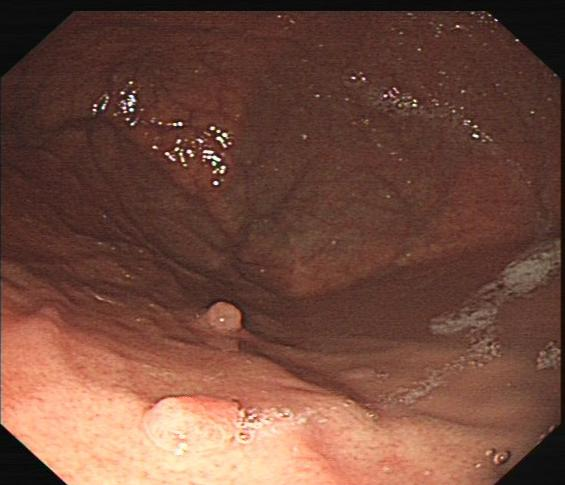

In [53]:
sample_image = Image.open('/kaggle/input/polyp-detection/Dataset-acess-for-PLOS-ONE-master/TrainValImages/102610_20150605001026013.jpg')

sample_image

In [54]:
with open('/kaggle/input/polyp-detection/Dataset-acess-for-PLOS-ONE-master/Annotations/102610_20150605001026013.xml') as annot_file:
    print(''.join(annot_file.readlines()))

<?xml version="1.0" ?>
<annotation>
    <folder>Polyp</folder>
    <filename>102610_20150605001026013.jpg</filename>
    <source>
        <database>Gastroscopy Database</database>
        <annotation>Polyp</annotation>
        <image>flickr</image>
        <flickrid>NULL</flickrid>
    </source>
    <owner>
        <flickrid>NULL</flickrid>
        <name>ZhangXu</name>
    </owner>
    <size>
        <width>565</width>
        <height>485</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>Polyp</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <bndbox>
            <xmin>141</xmin>
            <ymin>398</ymin>
            <xmax>254</xmax>
            <ymax>453</ymax>
        </bndbox>
    </object>
</annotation>



In [55]:
tree = ET.parse('/kaggle/input/polyp-detection/Dataset-acess-for-PLOS-ONE-master/Annotations/102610_20150605001026013.xml')
root = tree.getroot()

sample_annotations = []

for neighbor in root.iter('bndbox'):
    xmin = int(neighbor.find('xmin').text)
    ymin = int(neighbor.find('ymin').text)
    xmax = int(neighbor.find('xmax').text)
    ymax = int(neighbor.find('ymax').text)
    
#     print(xmin, ymin, xmax, ymax)
    sample_annotations.append([xmin, ymin, xmax, ymax])
    
print(sample_annotations)

[[141, 398, 254, 453]]


[141, 398, 254, 453]


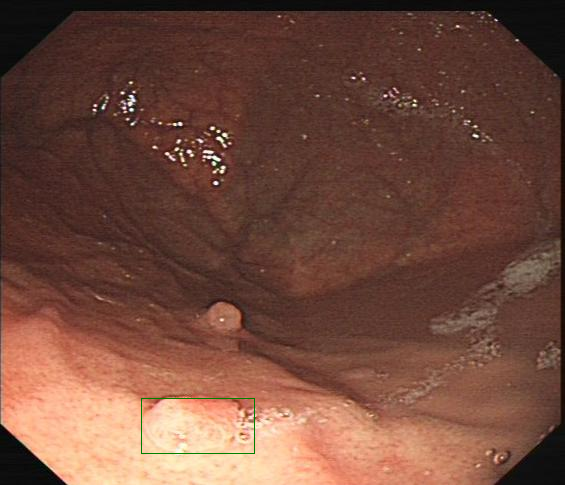

In [56]:
sample_image_annotated = sample_image.copy()

img_bbox = ImageDraw.Draw(sample_image_annotated)

for bbox in sample_annotations:
    print(bbox)
    img_bbox.rectangle(bbox, outline="green") 
    
sample_image_annotated

In [57]:
def extract_boxes(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    sample_annotations = []

    for neighbor in root.iter('bndbox'):
        xmin = int(neighbor.find('xmin').text)
        ymin = int(neighbor.find('ymin').text)
        xmax = int(neighbor.find('xmax').text)
        ymax = int(neighbor.find('ymax').text)
        sample_annotations.append([xmin, ymin, xmax, ymax])

    return sample_annotations

In [15]:
def extract_boxes(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    sample_annotations = []

    #for neighbor in root.iter('bndbox'):
    xmin = int(neighbor.find('xmin').text)
    ymin = int(neighbor.find('ymin').text)
    xmax = int(neighbor.find('xmax').text)
    ymax = int(neighbor.find('ymax').text)
        #sample_annotations.append([xmin, ymin, xmax, ymax])
    return xmin, ymin, xmax, ymax

In [62]:
def create_mask(image_size , bounding_box):
    mask=np.zeros(image_size, dtype=np.uint8)
    for bbox in bounding_box:
        xmin, ymin, xmax, ymax = map(int, bbox)
        mask[ymin:ymax, xmin:xmax] = 1
    #xmin, ymin, xmax, ymax = map(int, bounding_box)
    #mask[ymin:ymax, xmin:xmax]=1
    return mask

In [63]:
def processing_of_images(xml_folder, image_folder, output_mask):
    xml_files=os.listdir(xml_folder)
    
    for xml_file in xml_files:
        xml_path=os.path.join(xml_folder,xml_file)
        filename = xml_file.replace('.xml','.jpg')
        image_path = os.path.join(image_folder,filename)
        output_mask_path=os.path.join(output_mask, xml_file.replace('.xml','.jpg'))
        
        image=cv2.imread(image_path)
        image_size = image.shape[:2]
        
        bounding_box = extract_boxes(xml_path)
        
        mask= create_mask(image_size, bounding_box)
        cv2.imwrite(output_mask_path, mask * 255)
               

xml_folder="/kaggle/input/polyp-detection/Dataset-acess-for-PLOS-ONE-master/Annotations"
image_folder="/kaggle/input/polyp-detection/Dataset-acess-for-PLOS-ONE-master/TrainValImages"
output_mask="/kaggle/working/masks"

os.makedirs(output_mask, exist_ok=True)

processing_of_images(xml_folder,image_folder,output_mask)    

In [64]:
images_path="/kaggle/input/polyp-detection/Dataset-acess-for-PLOS-ONE-master/TrainValImages"
mask_path="/kaggle/working/masks"

In [65]:
image_name=next(os.walk(images_path))[2]
mask_name=next(os.walk(mask_path))[2]
print(image_name)
print(mask_name)

['102329_20150619001036014_tb.jpg', '100419_20150309001022008.jpg', '101856_20150408001096002_tb.jpg', '100218_20150107001043013.jpg', '102483_20150508001027013_tb.jpg', '100408_20150306001035008_tb.jpg', '101813_20150312001047014.jpg', '102678_20150520001022030.jpg', '101875_20150409001096019_tb.jpg', '101156_20150325001066012_tb.jpg', '101148_20150330001035011.jpg', '101083_20150323001056017_tb.jpg', '100397_20150309001010004_tb.jpg', '101168_20150325001100007.jpg', '102429_20150504001045018.jpg', '100307_20150306001003012.jpg', '100877_20150323001027014_tb.jpg', '100562_20150106001062001_tb.jpg', '100523_20150313001024009_tb.jpg', '100299_20150318001001016.jpg', '100314_20150318001002013.jpg', '100461_20150312001006013_tb.jpg', '100155_20150105001010004.jpg', '102581_20150514001063018_tb.jpg', '100528_20150313001024020_tb.jpg', '102568_20150520001014003.jpg', '100713_20150311001072007.jpg', '100403_20150305001044009.jpg', '102536_20150520001007004.jpg', '101069_20150327001016002.jpg

In [66]:
x=np.zeros((len(image_name),256,256,3), dtype=np.uint8)
y=np.zeros((len(mask_name),256,256,1), dtype=np.bool_)

In [68]:
import os
import cv2
from glob import glob
import numpy as np

In [69]:

from skimage.transform import resize
from skimage.io import imread
from skimage.color import rgb2gray as rbgc
from tqdm import tqdm


In [70]:
images_path="/kaggle/input/polyp-detection/Dataset-acess-for-PLOS-ONE-master/TrainValImages"
mask_path="/kaggle/working/masks"

In [71]:
im_path=sorted(glob(os.path.join(images_path,"*.jpg")))

In [72]:
print(len(im_path))

758


In [ ]:
x=np.zeros((len(im_path),256,256,3), dtype=np.uint8)
y=np.zeros((len(im_path),256,256,1), dtype=np.bool_)

In [73]:
im_path=sorted(glob(os.path.join(images_path,"*.jpg")))


In [78]:
x = []
y = []

for k, ima_path in tqdm(enumerate(im_path), total=len(im_path)):
    img = cv2.imread(ima_path)[:,:,:3]
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_LINEAR)

    #mask_layer = os.path.basename(ima_path)
    base_name, ext = os.path.splitext(os.path.basename(ima_path))
    #mask_layer = base_name + '_mask.png'
    mask_layer = os.path.basename(ima_path)
    mask_paths = os.path.join(mask_path, mask_layer)
    

    if not os.path.exists(mask_paths):
        print(f"Error: Mask file does not exist at {mask_paths}")
        continue
    mask = cv2.imread(mask_paths, cv2.IMREAD_GRAYSCALE)  # Read mask as grayscale

    if mask is None:
        print("Error: Failed to load mask image at", mask_paths)
        continue  # Skip to the next iteration if loading fails

    mask = cv2.resize(mask, (256, 256), interpolation=cv2.INTER_LINEAR)
    mask = np.expand_dims(mask, axis=-1)  # Add channel dimension to the mask

    x.append(img)
    y.append(mask)

# Convert x and y to NumPy arrays for further processing
x = np.array(x)
y = np.array(y)

100%|██████████| 758/758 [00:04<00:00, 161.45it/s]


In [79]:
import random
import matplotlib.pyplot as plt

In [80]:
print(len(x))
print(len(y))

758
758


Random index: 494
Image path: /kaggle/input/polyp-detection/Dataset-acess-for-PLOS-ONE-master/TrainValImages/101884_20150414001038014.jpg
Mask path: /kaggle/working/masks/101884_20150414001038014.jpg
Image shape: (256, 256, 3)
Image dtype: uint8
Image data: [[[9 9 9]
  [9 9 9]
  [9 9 9]
  ...
  [9 9 9]
  [9 9 9]
  [9 9 9]]

 [[9 9 9]
  [9 9 9]
  [9 9 9]
  ...
  [8 8 8]
  [9 9 9]
  [9 9 9]]

 [[9 9 9]
  [9 9 9]
  [9 9 9]
  ...
  [8 8 8]
  [9 9 9]
  [9 9 9]]

 ...

 [[9 9 9]
  [9 9 9]
  [9 9 9]
  ...
  [8 8 8]
  [9 9 9]
  [9 9 9]]

 [[9 9 9]
  [9 9 9]
  [9 9 9]
  ...
  [8 8 8]
  [9 9 9]
  [9 9 9]]

 [[9 9 9]
  [9 9 9]
  [9 9 9]
  ...
  [8 8 8]
  [9 9 9]
  [9 9 9]]]
Mask data: [[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


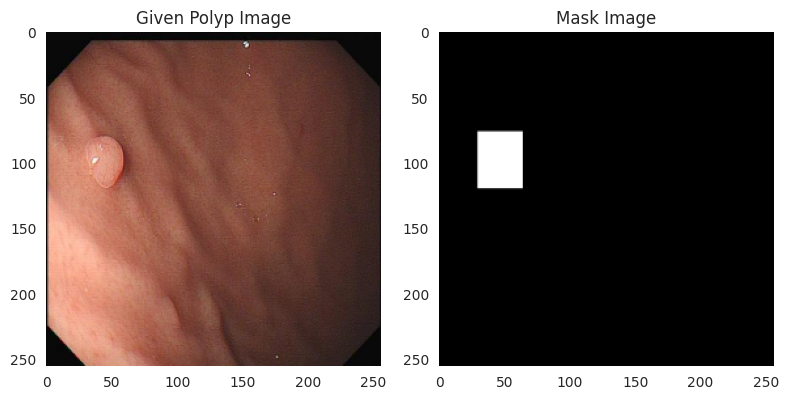

In [84]:
if len(x) > 0 and len(y) > 0:
    #random.seed(42)
    ran_image = random.randint(0, len(x) - 1)  # Use the same index for both x and y
    
    print("Random index:", ran_image)
    print("Image path:", im_path[ran_image])
    print("Mask path:", os.path.join(mask_path, os.path.basename(im_path[ran_image])))

    print("Image shape:", x[ran_image].shape)
    print("Image dtype:", x[ran_image].dtype)
    print("Image data:", x[ran_image])
    print("Mask data:", y[ran_image])
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(x[ran_image], cv2.COLOR_BGR2RGB))
    plt.title("Given Polyp Image")

    plt.subplot(1, 2, 2)
    #plt.imshow(y[ran_image].astype(np.uint8), cmap='gray')
    plt.imshow(np.squeeze(y[ran_image]).astype(np.uint8), cmap='gray')
    plt.title("Mask Image")

    plt.tight_layout()
    plt.show()
else:
    print("Error: The lists x and y are empty.")

In [85]:
def np_resize(img, input_shape):
    
    height, width = input_shape
    return cv2.resize(img, (width, height))

def mask2rle(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formatted
    '''
    pixels= img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle2mask(rle, input_shape):
    width, height = input_shape[:2]
    
    mask= np.zeros( width*height ).astype(np.uint8)
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 1
        current_position += lengths[index]
    current_output = mask.reshape(height, width).T
    #new_output = np.expand_dims(current_output, axis=-1)
    return current_output

In [86]:
def build_masks(rles, input_shape, reshape=None):
    depth = len(rles)
    d=depth
    if reshape is None:
        masks = np.zeros((*input_shape, depth))
    else:
        masks = np.zeros((*reshape, depth))
    
    for i, rle in enumerate(rles):
        if type(rle) is str:
            if reshape is None:
                masks[:, :, i] = rle2mask(rle, input_shape)
            else:
                mask = rle2mask(rle, input_shape)
                reshaped_mask = np_resize(mask, reshape)
                masks[:, :, i] = reshaped_mask
    
    return masks

def build_rles(masks, reshape=None):
    width, height, depth = masks.shape
    
    rles = []
    
    for i in range(depth):
        mask = masks[:, :, i]
        
        if reshape:
            mask = mask.astype(np.float32)
            mask = np_resize(mask, reshape).astype(np.int64)
        
        rle = mask2rle(mask)
        rles.append(rle)
        
    return rles

In [87]:
h=256
w=256

In [90]:
test_size = 0.1
validation_size = 0.2
random_seed = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_seed)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=validation_size, random_state=random_seed)

In [91]:
print("train set:", len(x_train))
print("valid set:", len(x_val))
print("test set:", len(x_test))

train set: 682
valid set: 60
test set: 16


In [92]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f)
    return (2.0 * intersection + 1e-7) / (union + 1e-7)

def iou_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
    return (intersection + 1e-7) / (union + 1e-7)

def f1_score(y_true,y_pred):
    y_true=tf.cast(y_true, tf.float32)
    y_pred=tf.cast(tf.math.round(y_pred), tf.float32)
    
    tp=tf.reduce_sum(y_true*y_pred)
    fp=tf.reduce_sum((1-y_true)*y_pred)
    fn=tf.reduce_sum(y_true*(1-y_pred))
    
    precision=tp / (tp+fp+tf.keras.backend.epsilon())
    recall=tp / (tp+fn+tf.keras.backend.epsilon())
    
    f1=2*precision*recall/(precision+recall+tf.keras.backend.epsilon())
    return f1

In [93]:
def conv_block(inputs,filters,kernel_size=(3,3),activation='relu',padding='same'):
    x=conv2D(filters,kernel_size,activation,padding=padding)(inputs)
    x=BatchNormalization()(x)
    x=Activation(activation)(x)
    return x


In [94]:
import os
os.environ["TF CPP MIN LOG LEVEL"]="2"

from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, UpSampling2D
from tensorflow.keras.layers import AveragePooling2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

def ASPP(inputs):
    shape=inputs.shape[1:3]
    y_pool=AveragePooling2D(pool_size=(shape[0],shape[1]))(inputs)
    y_pool=Conv2D(filters=256,kernel_size=(1,1),padding='same',use_bias=False)(y_pool)
    y_pool=BatchNormalization()(y_pool)
    y_pool=Activation("relu")(y_pool)
    y_pool=UpSampling2D((shape[0],shape[1]),interpolation="bilinear")(y_pool)
    
    y_1=Conv2D(filters=256,kernel_size=(1,1),padding='same',use_bias=False)(inputs)
    y_1=BatchNormalization()(y_1)
    y_1=Activation("relu")(y_1)
    
    y_6=Conv2D(filters=256,kernel_size=(3,3),dilation_rate=6,padding='same',use_bias=False)(inputs)
    y_6=BatchNormalization()(y_6)
    y_6=Activation("relu")(y_6)
    
    y_12=Conv2D(filters=256,kernel_size=(3,3),dilation_rate=12,padding='same',use_bias=False)(inputs)
    y_12=BatchNormalization()(y_12)
    y_12=Activation("relu")(y_12)
    
    y_18=Conv2D(filters=256,kernel_size=(3,3),dilation_rate=18,padding='same',use_bias=False)(inputs)
    y_18=BatchNormalization()(y_18)
    y_18=Activation("relu")(y_18)
    
    y=Concatenate()([y_pool, y_1, y_6, y_12, y_18])
    
    y=Conv2D(filters=256,kernel_size=(1,1),dilation_rate=1,padding='same',use_bias=False)(y)
    y=BatchNormalization()(y)
    y=Activation("relu")(y)
    
    return y

In [95]:
def DeepLabV3Plus(shape):
    inputs=Input(shape)
    
    base_model = MobileNetV2(weights='imagenet',include_top=False, input_tensor=inputs)
    images_features=base_model.get_layer('out_relu').output
    x_a=ASPP(images_features)
    x_a=UpSampling2D((4,4),interpolation="bilinear")(x_a)
    
    x_b=base_model.output
    x_b=Conv2D(filters=48,kernel_size=(3,3),padding='same',use_bias=False)(x_b)
    x_b=BatchNormalization()(x_b)
    x_b=Activation('relu')(x_b)
    x_b = UpSampling2D(size=(2, 2))(x_b)
    x_b = UpSampling2D(size=(2, 2))(x_b)
    
    x_a = Conv2D(filters=48, kernel_size=(1, 1), padding='same', use_bias=False)(x_a)
    x_a = BatchNormalization()(x_a)
    x_a = Activation('relu')(x_a)
    
    
    x=Concatenate()([x_a,x_b])
    
    x=Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu',use_bias=False)(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    
    x=Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu',use_bias=False)(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    
    x=UpSampling2D((4,4),interpolation="bilinear")(x)
    
    x=Conv2D(1,(1,1),name='output_layer')(x)
    x=Activation('sigmoid')(x)
    
    model=Model(inputs=inputs, outputs=x)
    return model

if __name__=="__main__":
    input_shape = (256,256,3)
    model=DeepLabV3Plus(input_shape)
    model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N

In [96]:
from tensorflow.keras import layers, initializers, activations

In [97]:
def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    padding="same",
    use_bias=False,
):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return activations.relu(x)

In [98]:
def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]),
        interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output

In [99]:
def DeeplabV3Plus(image_size, num_classes):
    model_input = keras.Input(shape=(image_size, image_size, 3))
    preprocessed = keras.applications.mobilenet_v2.preprocess_input(model_input)
    mobilenet = keras.applications.mobilenet_v2.MobileNetV2(
        weights="imagenet", include_top=False, input_tensor=preprocessed
    )
    x = mobilenet.get_layer("out_relu").output
    x = DilatedSpatialPyramidPooling(x)

    input_a = layers.UpSampling2D(
        size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
        interpolation="bilinear",
    )(x)
    input_b = mobilenet.get_layer("block_8_depthwise_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)
    input_b = layers.UpSampling2D(
        size=(image_size // 4 // input_b.shape[1], image_size // 4 // input_b.shape[2]),
        interpolation="bilinear",
    )(input_b)

    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = layers.UpSampling2D(
        size=(image_size // x.shape[1], image_size // x.shape[2]),
        interpolation="bilinear",
    )(x)
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    return keras.Model(inputs=model_input, outputs=model_output)

model = DeeplabV3Plus(image_size=256, num_classes=1)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 tf.math.truediv (TFOpLambd  (None, 256, 256, 3)          0         ['input_2[0][0]']             
 a)                                                                                               
                                                                                                  
 tf.math.subtract (TFOpLamb  (None, 256, 256, 3)          0         ['tf.math.truediv[0][0]']     
 da)                                                                                              
                                                                                            

In [102]:
no_of_samples=758
test_size=0.1
validation_size=0.2
bootstrap_index=np.random.choice(len(x),size=no_of_samples,replace=True)

x_boot=x[bootstrap_index]
y_boot=y[bootstrap_index]

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_boot,y_boot,test_size=test_size, random_state=42, shuffle=True)
x_val_1, x_test_1, y_val_1, y_test_1 = train_test_split(x_test_1,y_test_1,test_size=validation_size,random_state=42)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_boot,y_boot,test_size=test_size, random_state=42, shuffle=True)
x_val_2, x_test_2, y_val_2, y_test_2 = train_test_split(x_test_2,y_test_2,test_size=validation_size,random_state=42)

In [103]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
Deeplab_predict=[]
Deeplab_predict_v=[]

num_runs=1
batch_size=16
epoch_steps=len(x_train)//batch_size
validation_step=len(x_test)//batch_size

for _ in range(num_runs):
    Deeplab_model=DeeplabV3Plus(image_size=256, num_classes=1)
    Deeplab_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    Deeplab_model.fit(x_train_1,y_train_1,steps_per_epoch=epoch_steps,validation_steps=validation_step,epochs=20,validation_data=(x_val_1,y_val_1))
    Deeplab_model.save('DeeplabV3Plus_model.h5')
    Deeplab_pred=Deeplab_model.predict(x_val)
    Deeplab_pred_v=Deeplab_model.predict(x_test)
    Deeplab_predict.append(Deeplab_pred)
    Deeplab_predict_v.append(Deeplab_pred_v)


Epoch 1/20
42/42 [==============================] - 1764s 42s/step - loss: -124.4289 - accuracy: 0.4284 - val_loss: 143.8854 - val_accuracy: 0.9355
Epoch 2/20
42/42 [==============================] - 1798s 43s/step - loss: -142.0461 - accuracy: 0.3658 - val_loss: -160.8276 - val_accuracy: 0.5024
Epoch 3/20
42/42 [==============================] - 1807s 43s/step - loss: -135.7342 - accuracy: 0.4928 - val_loss: -184.8906 - val_accuracy: 0.2816
Epoch 4/20
24/42 [================>.............] - ETA: 13:08 - loss: -142.4552 - accuracy: 0.5603